In [33]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
#import pyproj
#import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
from netCDF4 import Dataset
import glob
import datetime as dt
#import metpy.calc as mpcalc
#from metpy.units import units
#from metpy.cbook import get_test_data
#from metpy.io import metar
#from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     #PanelContainer, PlotObs)
from netCDF4 import date2num,num2date
#from scipy.ndimage import gaussian_filter
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords

In [34]:
wrfout0 = xr.open_dataset('wrfout_d03_2018-03-25_00_00_00')
wrfout0_2 = xr.open_dataset('wrfout_d02_2018-03-25_00_00_00')
#wrfout0_1 = Dataset('wrfout_d01_2018-03-25_00_00_00')

#D1 has no currents
#D1_current_0 =  Dataset('auxhist24_d01_2018-03-25_00_00_00')
#D1_current_1 =  Dataset('auxhist24_d01_2018-03-25_01_00_00')
#D1_current_2 =  Dataset('auxhist24_d01_2018-03-25_02_00_00')
#D1_current_3 =  Dataset('auxhist24_d01_2018-03-25_03_00_00')
#D1_current_4 =  Dataset('auxhist24_d01_2018-03-25_04_00_00')
#D1_current_5 =  Dataset('auxhist24_d01_2018-03-25_05_00_00')
#D1_current_6 =  Dataset('auxhist24_d01_2018-03-25_06_00_00')

D2_current_0 =  xr.open_dataset('auxhist24_d02_2018-03-25_00_00_00')
D2_current_1 =  xr.open_dataset('auxhist24_d02_2018-03-25_01_00_00')
D2_current_3 =  xr.open_dataset('auxhist24_d02_2018-03-25_03_00_00')
D2_current_4 =  xr.open_dataset('auxhist24_d02_2018-03-25_04_00_00')
D2_current_5 =  xr.open_dataset('auxhist24_d02_2018-03-25_05_00_00')
D2_current_6 =  xr.open_dataset('auxhist24_d02_2018-03-25_06_00_00')

D3_current_0 =  xr.open_dataset('auxhist24_d03_2018-03-25_00_00_00')
D3_current_1 =  xr.open_dataset('auxhist24_d03_2018-03-25_01_00_00')
D3_current_2 =  xr.open_dataset('auxhist24_d03_2018-03-25_02_00_00')
D3_current_3 =  xr.open_dataset('auxhist24_d03_2018-03-25_03_00_00')
D3_current_4 =  xr.open_dataset('auxhist24_d03_2018-03-25_04_00_00')
D3_current_5 =  xr.open_dataset('auxhist24_d03_2018-03-25_05_00_00')


print('\n', D2_current_0.variables)
#print('\n', D2_current_1.variables)
#print(D2_current_2.variables)
#print('\n', D2_current_3.variables)
#print('\n', D2_current_4.variables)
#print('\n', D2_current_5.variables)
#print('\n', D2_current_6.variables)


 Frozen({'Times': <xarray.Variable (Time: 1)>
[1 values with dtype=|S19], 'UOCE': <xarray.Variable (Time: 1, south_north: 486, west_east: 651)>
[316386 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE ZONAL CURRENTS
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME, 'VOCE': <xarray.Variable (Time: 1, south_north: 486, west_east: 651)>
[316386 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE MERIDIONAL CURRENTS
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME, 'C1H': <xarray.Variable (Time: 1, bottom_top: 49)>
[49 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  half levels, c1h = d bf / d eta, using znw
    units:        Dimensionless
    stagger:      , 'C2H': <xarray.Variable (Time: 1, bottom_top: 49)>
[49 values with dtype=float32]
Attributes:
    F

In [38]:
#DOMAIN 2 
xlat_D2 =wrfout0_2.XLAT.values
xlon_D2 =wrfout0_2.XLONG.values
print(xlat_D2.shape, xlon_D2.shape)

#D3
xlat_D3 =wrfout0.XLAT.values
xlon_D3 =wrfout0.XLONG.values
print(xlat_D3.shape, xlon_D3.shape)

#DOMAIN 1
#xlat0_1 =getvar(wrfout0_1, "XLAT")
#xlon0_1 = getvar(wrfout0_1, "XLONG")
#print('\n',xlat0_1.shape, xlon0_1.shape)


(1, 486, 651) (1, 486, 651)
(1, 474, 639) (1, 474, 639)


In [37]:
'''
D1_uCur_0 =getvar(D1_current_0,"UOCE")
D1_vCur_0 =getvar(D1_current_0,"VOCE")
D1_uCur_1 =getvar(D1_current_1,"UOCE")
D1_vCur_1 =getvar(D1_current_1,"VOCE")
D1_uCur_2 =getvar(D1_current_2,"UOCE")
D1_vCur_2 =getvar(D1_current_2,"VOCE")
D1_uCur_3 =getvar(D1_current_3,"UOCE")
D1_vCur_3 =getvar(D1_current_3,"VOCE")
D1_uCur_4 =getvar(D1_current_4,"UOCE")
D1_vCur_4 =getvar(D1_current_4,"VOCE")
D1_uCur_5 =getvar(D1_current_5,"UOCE")
D1_vCur_5 =getvar(D1_current_5,"VOCE")
D1_uCur_6 =getvar(D1_current_6,"UOCE")
D1_vCur_6 =getvar(D1_current_6,"VOCE")
print(D1_uCur_1.shape)
print(D1_vCur_1.shape)
'''
D2_uCur_0 =D2_current_0.UOCE.values
D2_vCur_0 =D2_current_0.VOCE.values
D2_uCur_1 =D2_current_1.UOCE.values
D2_vCur_1 =D2_current_1.VOCE.values
D2_uCur_3 =D2_current_3.UOCE.values
D2_vCur_3 =D2_current_3.VOCE.values
D2_uCur_4 =D2_current_4.UOCE.values
D2_vCur_4 =D2_current_4.VOCE.values
D2_uCur_5 =D2_current_5.UOCE.values
D2_vCur_5 =D2_current_5.VOCE.values
D2_uCur_6 =D2_current_6.UOCE.values
D2_vCur_6 =D2_current_6.VOCE.values
print(D2_uCur_6.shape)
print(D2_vCur_6.shape)

D3_uCur_0 =D3_current_0.UOCE.values
D3_vCur_0 =D3_current_0.VOCE.values
D3_uCur_1 =D3_current_1.UOCE.values
D3_vCur_1 =D3_current_1.VOCE.values
D3_uCur_2 =D3_current_2.UOCE.values
D3_vCur_2 =D3_current_2.VOCE.values
D3_uCur_3 =D3_current_3.UOCE.values
D3_vCur_3 =D3_current_3.VOCE.values
D3_uCur_4 =D3_current_4.UOCE.values
D3_vCur_4 =D3_current_4.VOCE.values
D3_uCur_5 =D3_current_5.UOCE.values
D3_vCur_5 =D3_current_5.VOCE.values
D3_uCur_6 =D3_current_6.UOCE.values
D3_vCur_6 =D3_current_6.VOCE.values
print(D3_uCur_3.shape)
print(D3_vCur_3.shape)


(1, 486, 651)
(1, 486, 651)
(1, 474, 639)
(1, 474, 639)


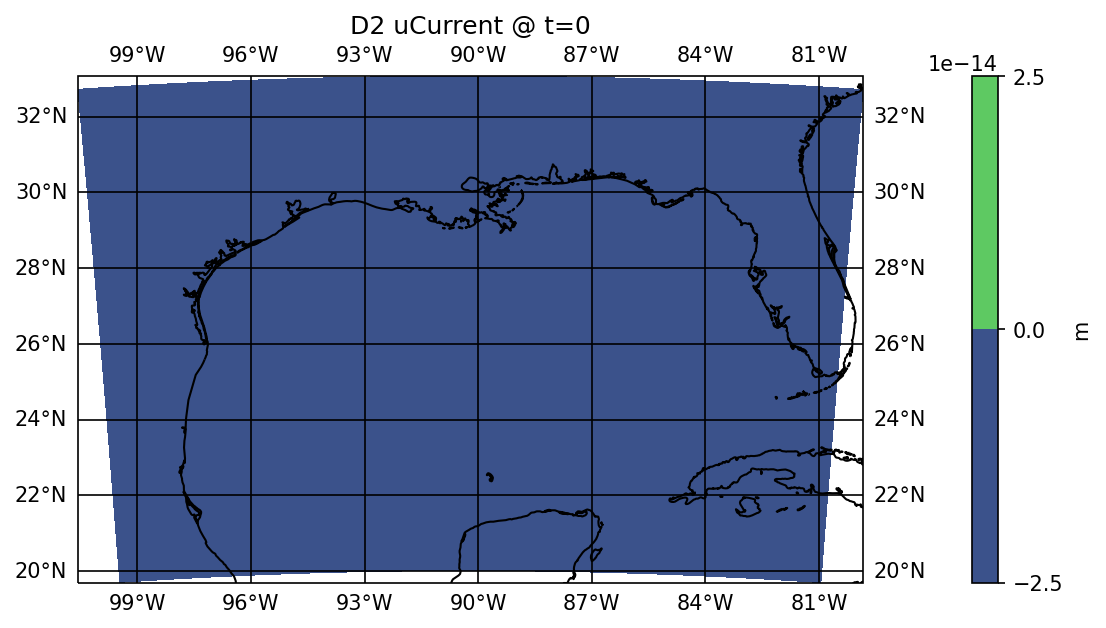

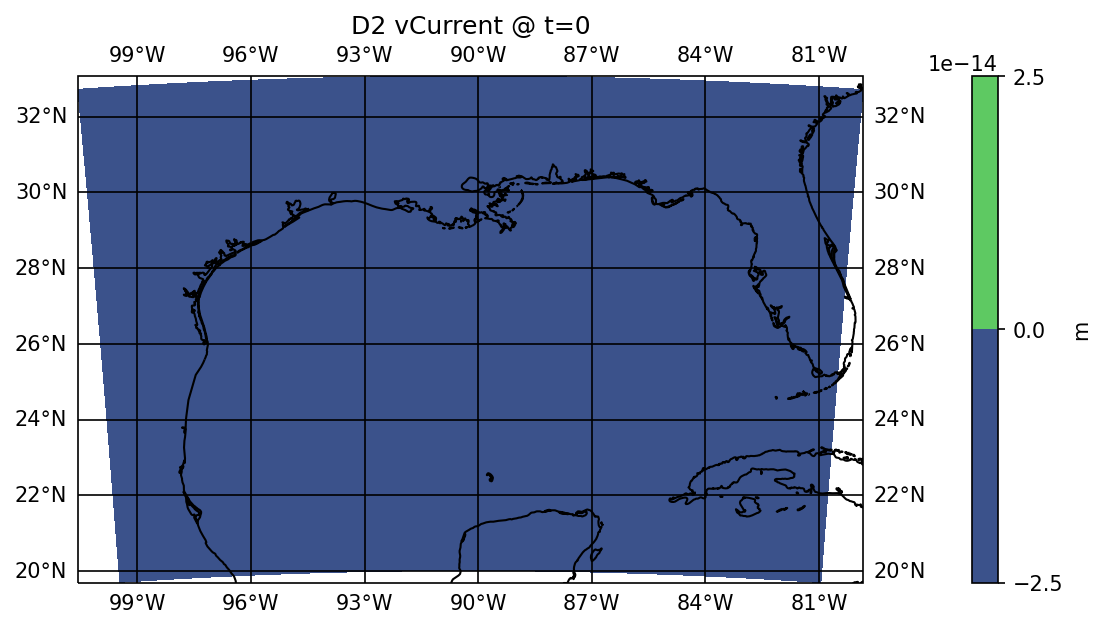

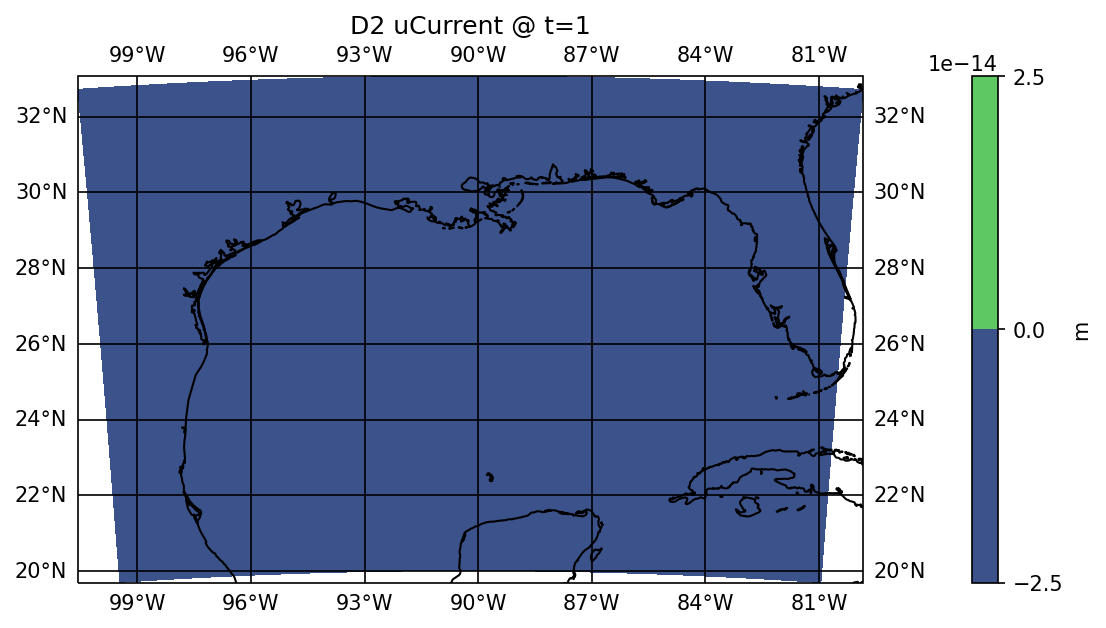

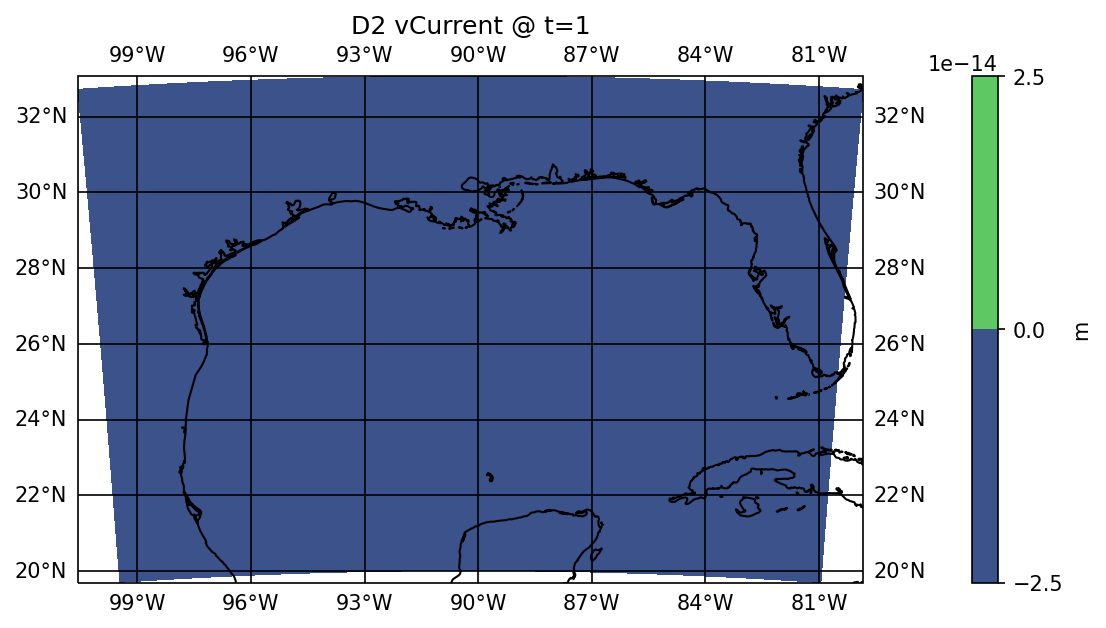

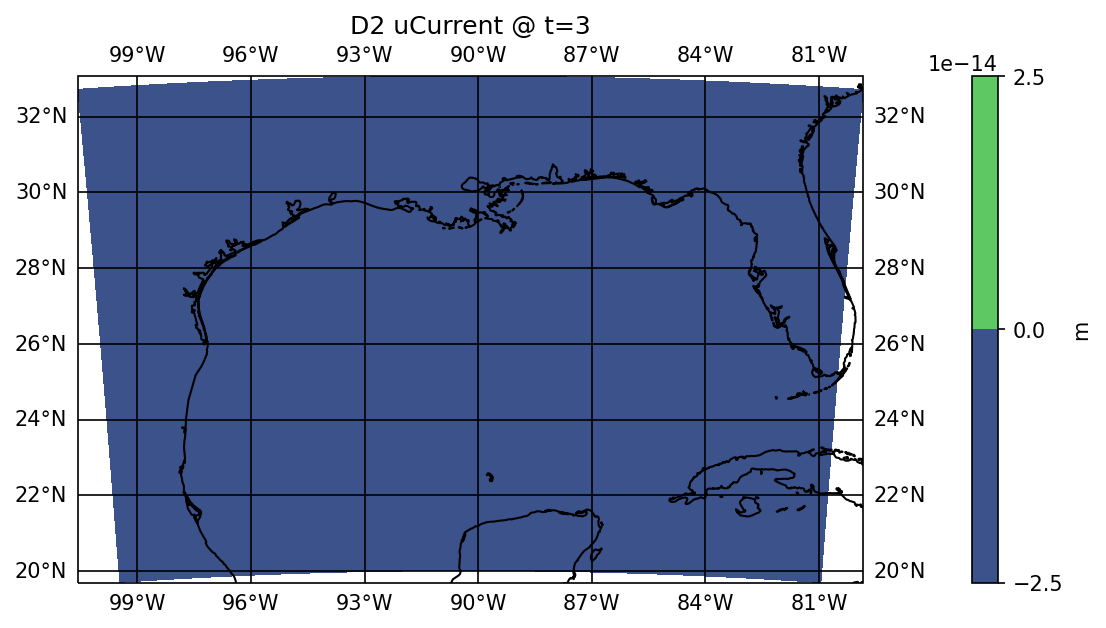

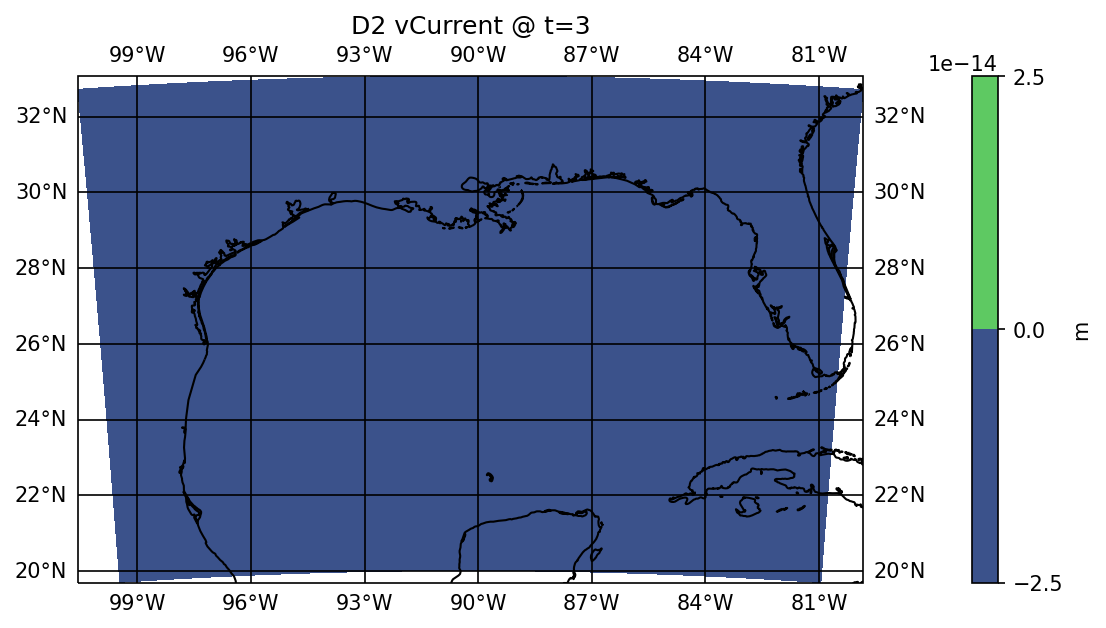

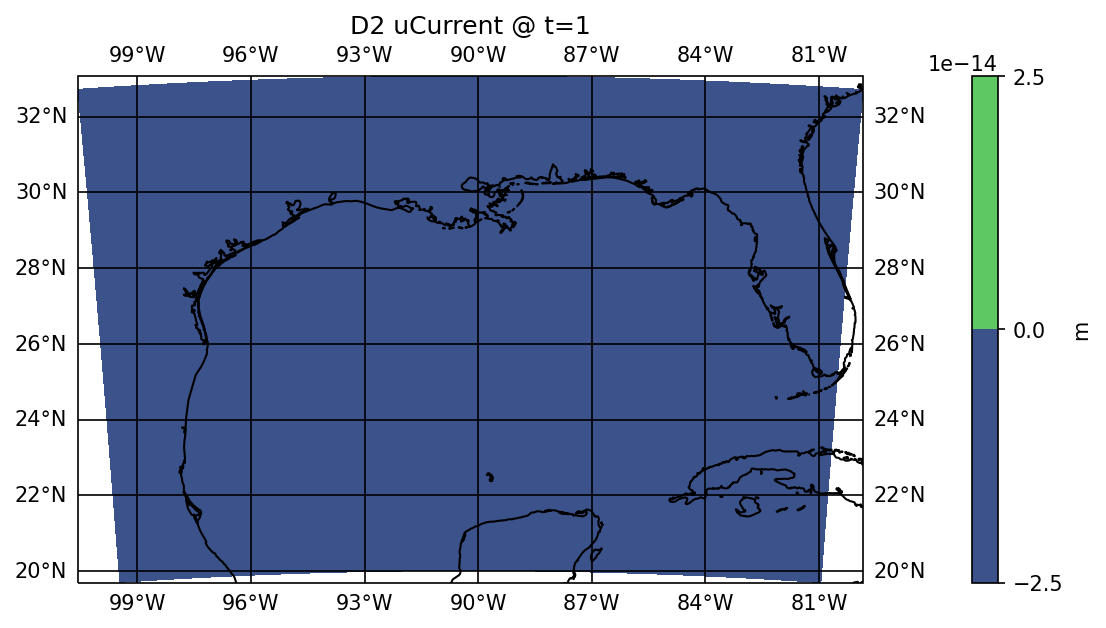

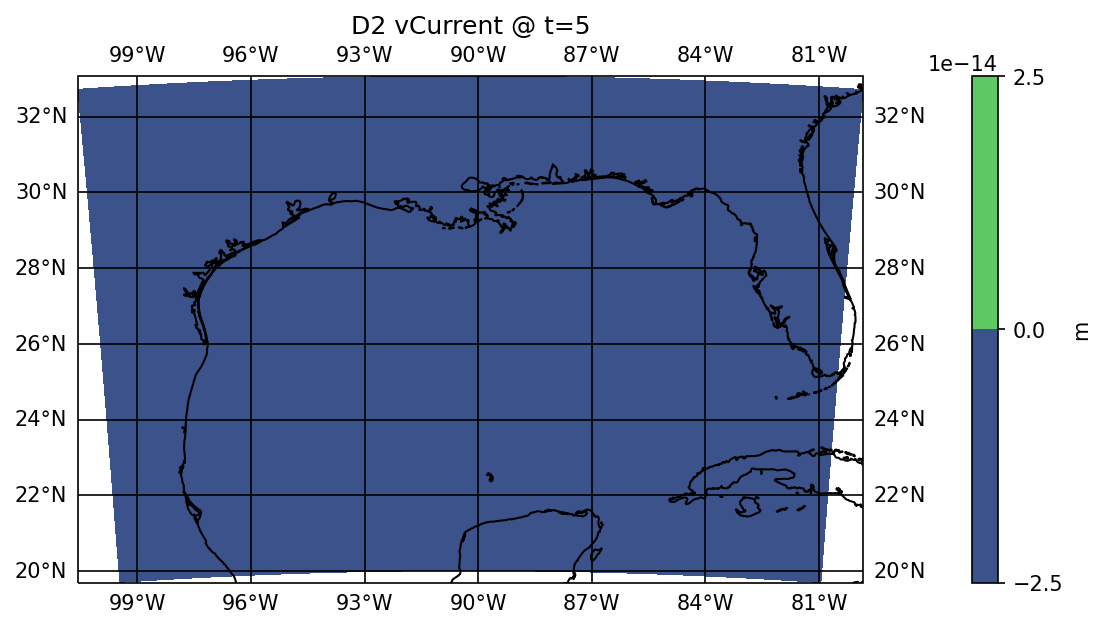

In [40]:
#D2
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_uCur_0[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 uCurrent @ t=0')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_uCur_0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_vCur_0[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 vCurrent @ t=0')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_vCur_0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_uCur_1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 uCurrent @ t=1')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_uCur_1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_vCur_1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 vCurrent @ t=1')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_vCur_1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_uCur_3[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 uCurrent @ t=3')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_uCur_3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_vCur_3[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 vCurrent @ t=3')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_vCur_3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_uCur_1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 uCurrent @ t=1')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_uCur_1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D2[0,:,:], xlat_D2[0,:,:], D2_vCur_5[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D2 vCurrent @ t=5')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D2_vCur_5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

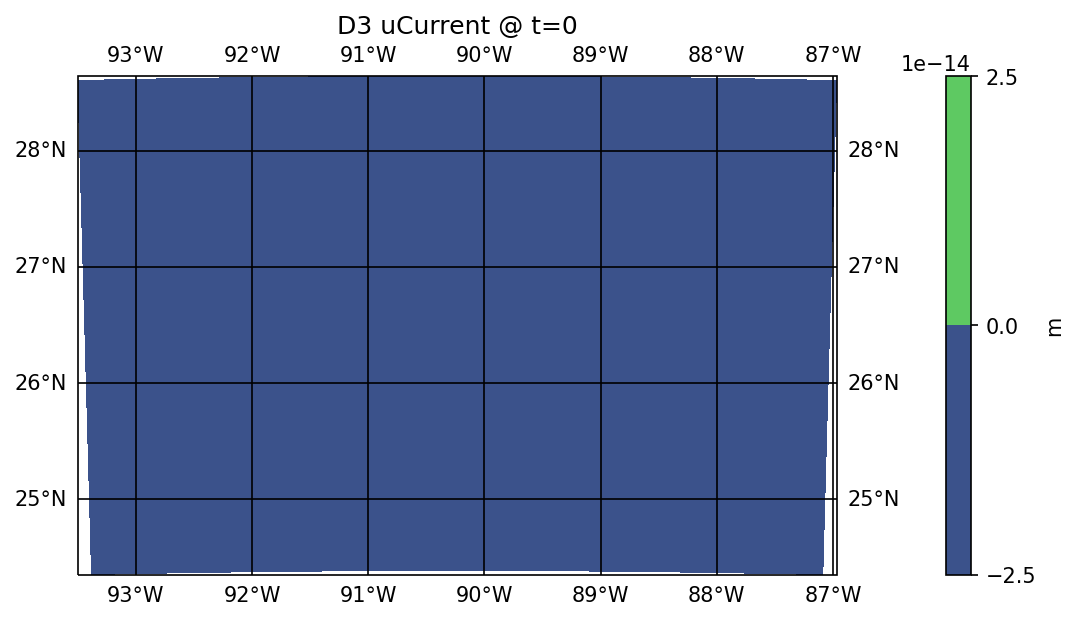

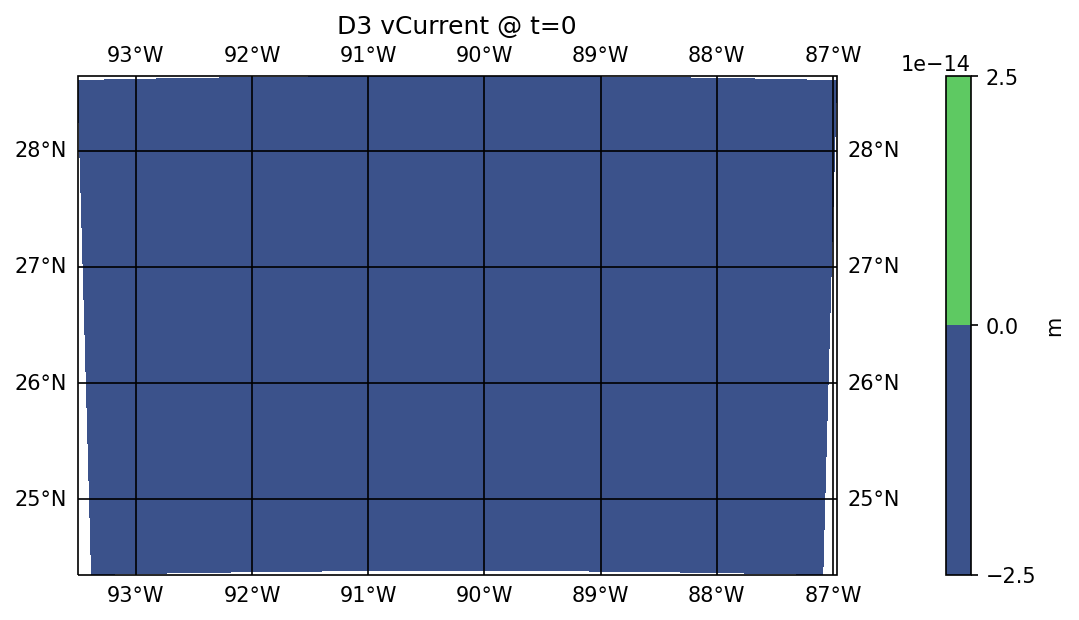

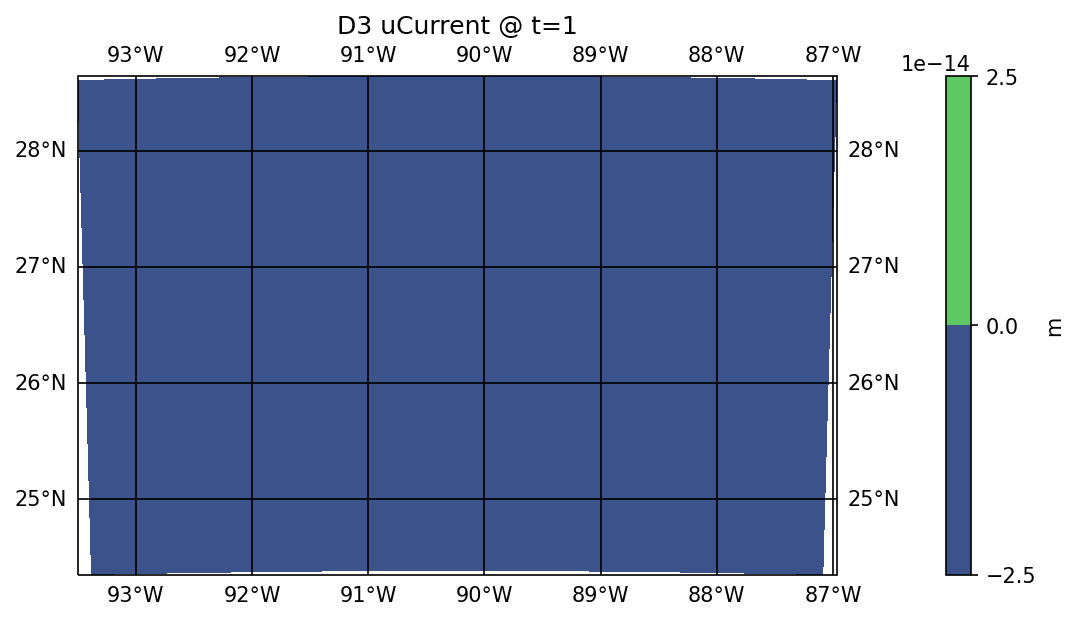

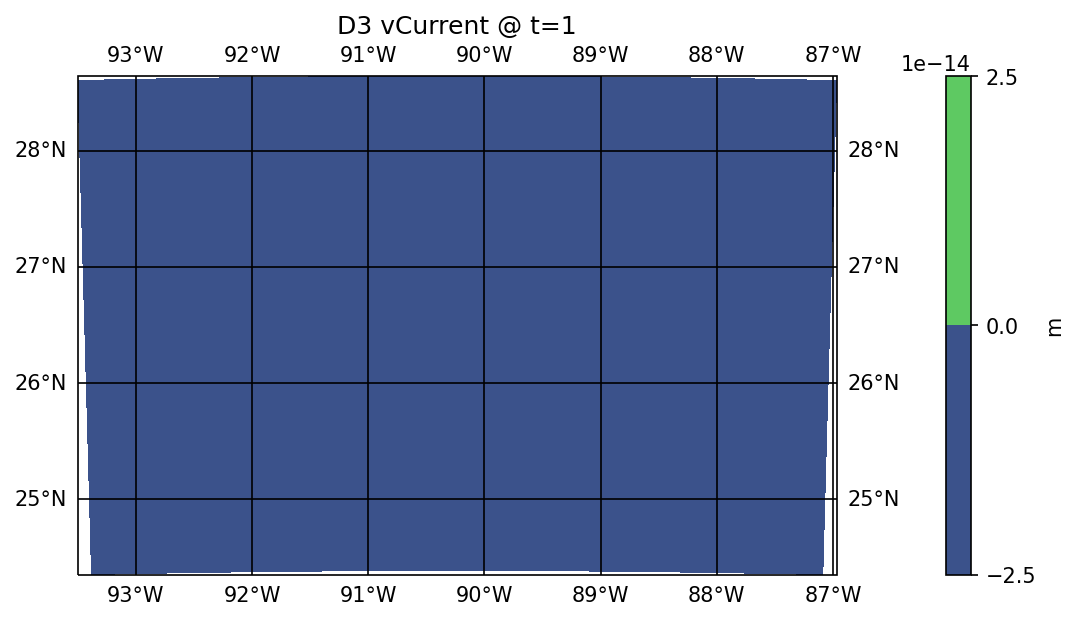

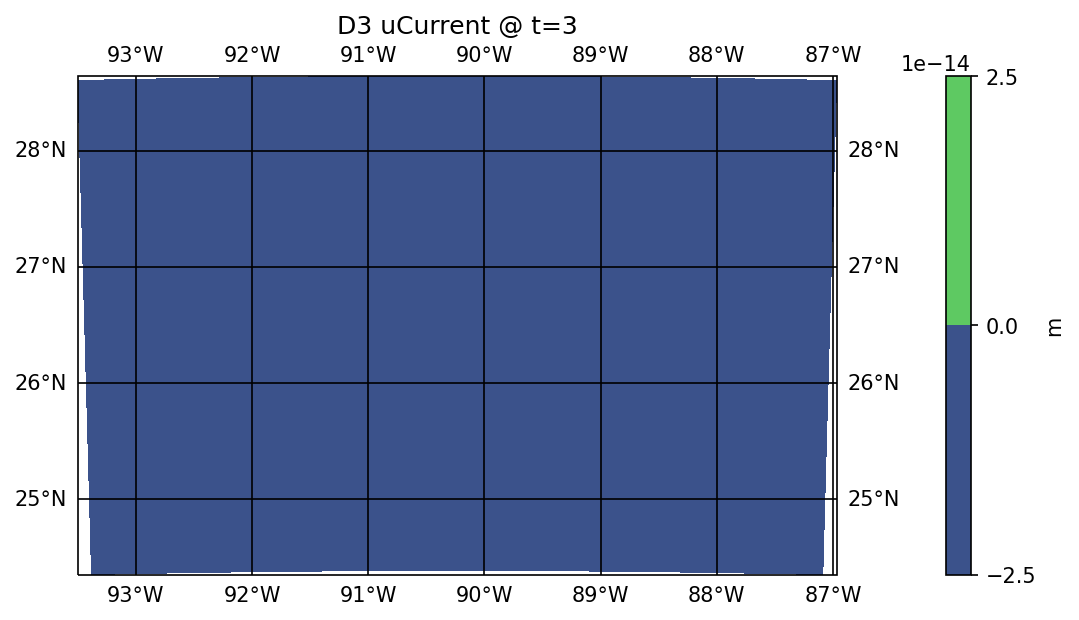

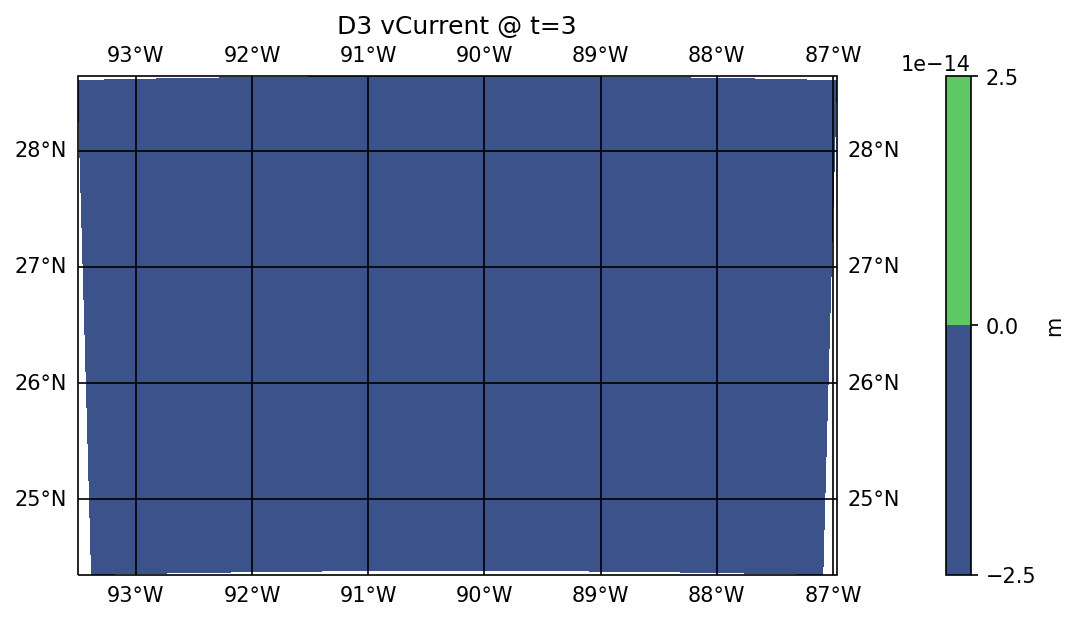

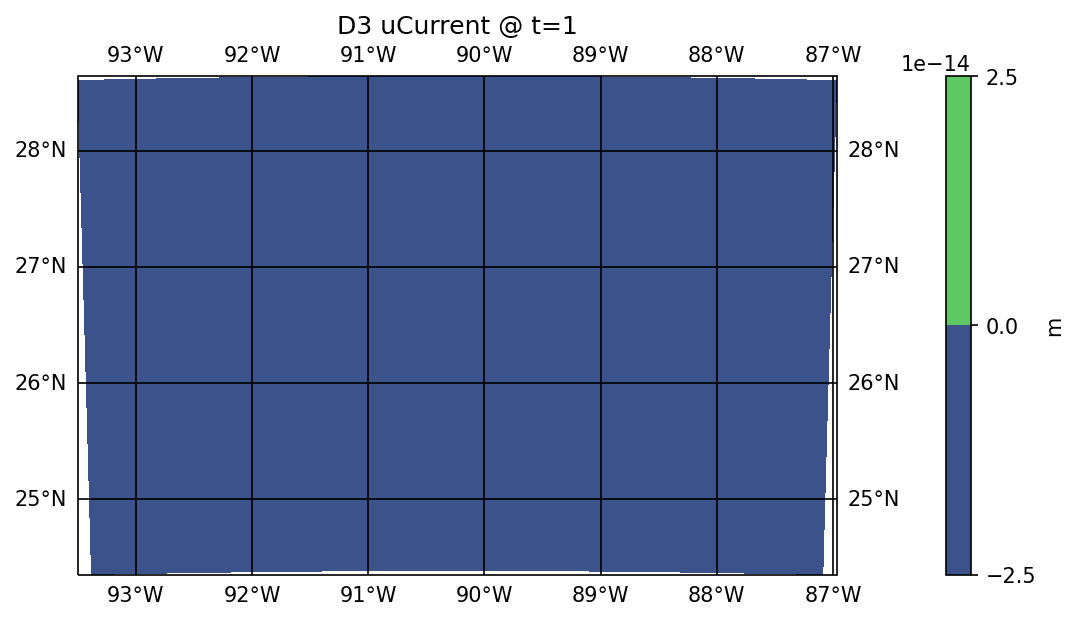

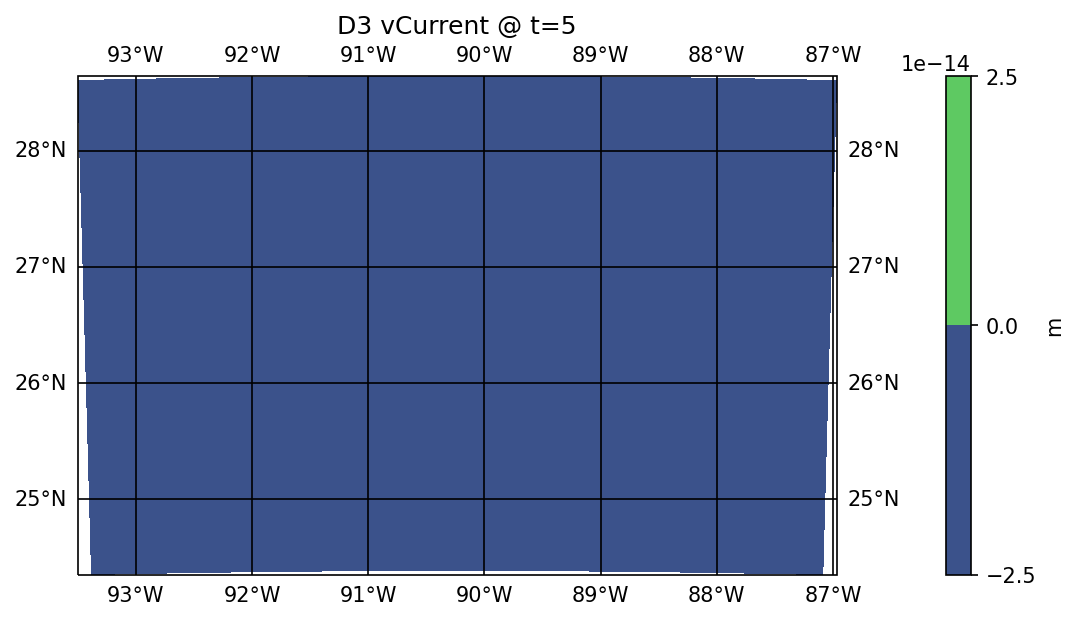

In [41]:
#D3
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_uCur_0[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 uCurrent @ t=0')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_uCur_0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_vCur_0[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 vCurrent @ t=0')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_vCur_0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_uCur_1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 uCurrent @ t=1')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_uCur_1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_vCur_1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 vCurrent @ t=1')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_vCur_1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_uCur_3[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 uCurrent @ t=3')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_uCur_3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_vCur_3[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 vCurrent @ t=3')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_vCur_3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_uCur_1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 uCurrent @ t=1')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_uCur_1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon_D3[0,:,:], xlat_D3[0,:,:], D3_vCur_5[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('D3 vCurrent @ t=5')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + 'D3_vCur_5.png', bbox_inches = 'tight',dpi = 150)
plt.show()